In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
import os, json

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors

path_to_json_files = '/content/drive/MyDrive/Machine Learning - SIT/exampleDATA'
#problem with this, is that the file have to be opened one by one and it takes veryyyyyy long

json_file_names = [filename for filename in os.listdir(path_to_json_files) if filename.endswith('.js')]



def load_waveform(json_file_names):
   
    with open(os.path.join(path_to_json_files, json_file_name)) as dataFile:
      data = dataFile.read()
      json_out = data[data.find('{'): data.rfind('}')+1]
      jsonObj = json.loads(json_out)

      if jsonObj['data']:
            waveform_data = pd.DataFrame(jsonObj['data'])    
            return waveform_data




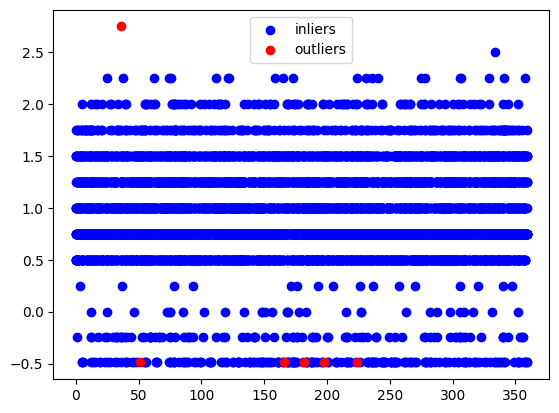

Number of outliers: 6 out of 15216
Which is: 0.03943217665615142%


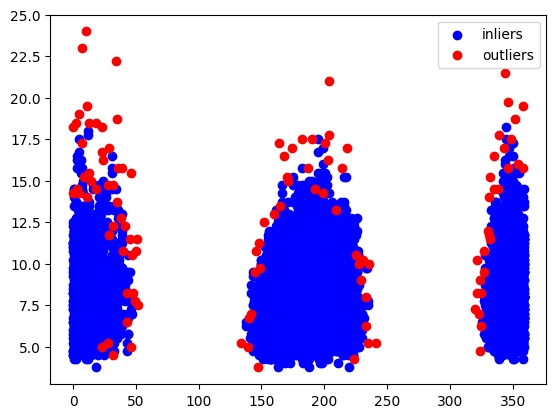

Number of outliers: 115 out of 24430
Which is: 0.47073270568972575%


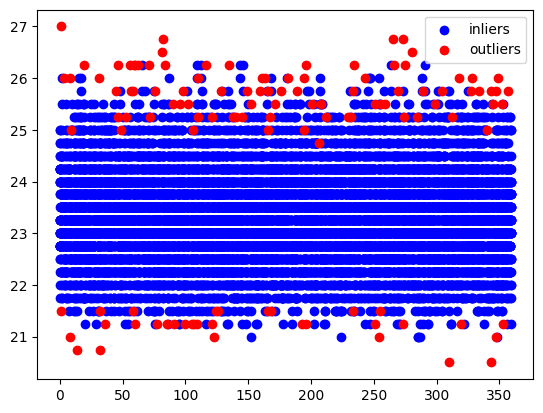

Number of outliers: 120 out of 32332
Which is: 0.37114932574539156%


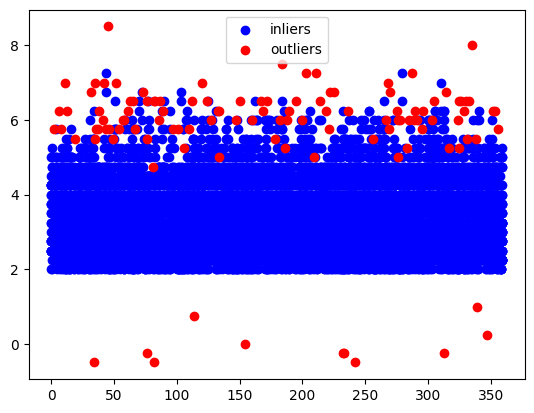

Number of outliers: 114 out of 28798
Which is: 0.3958608236683103%
0        120
1        124
2        125
3        127
4        203
        ... 
14394    102
14395    103
14396    104
14397    104
14398    104
Name: 2, Length: 14399, dtype: int64 0        7.00
1        6.50
2        6.50
3        6.00
4        7.25
         ... 
14394    3.25
14395    2.50
14396    2.50
14397    2.75
14398    3.25
Name: 0, Length: 14399, dtype: float64


In [108]:
for json_file_name in json_file_names:
  
    waveform = load_waveform(json_file_names)
    # fig = plt.figure()
    # fig.set_figwidth(20)     

    # plt_1 = plt.subplot(1, 2, 1)    
    # plt.plot( waveform[2],  waveform[0], 'o')

    X =np.column_stack(((waveform[2], waveform[0])))

    k = 2
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)
    max_distance = np.amax(distances[:, 1:], axis=1)
    threshold = np.percentile(max_distance, 99)

    # Classify points as outliers or inliers based on the threshold
    outlier_mask = max_distance > threshold
    inlier_mask = max_distance <= threshold

    # Plot the data points, with outliers in red and inliers in blue
    plt.scatter(X[~outlier_mask][:, 0], X[~outlier_mask][:, 1], c='blue', label='inliers')
    plt.scatter(X[outlier_mask][:, 0], X[outlier_mask][:, 1], c='red', label='outliers')
    plt.legend()
    plt.show()

    # Print the results
    print(f"Number of outliers: {np.sum(outlier_mask)} out of {X.size}")
    print(f"Which is: {(np.sum(outlier_mask)/X.size)*100}%")


print(waveform[2],  waveform[0])

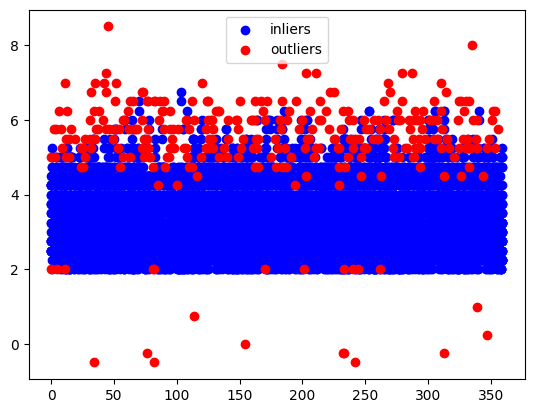

Number of outliers: 310 out of 28798
Which is: 1.076463643308563%, which is higher than 0.1%


In [109]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors

X =np.column_stack(((waveform[2], waveform[0])))

k = 2
nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
max_distance = np.amax(distances[:, 1:], axis=1)
threshold = np.percentile(max_distance, 95)

# Classify points as outliers or inliers based on the threshold
outlier_mask = max_distance > threshold
inlier_mask = max_distance <= threshold

# Plot the data points, with outliers in red and inliers in blue
plt.scatter(X[~outlier_mask][:, 0], X[~outlier_mask][:, 1], c='blue', label='inliers')
plt.scatter(X[outlier_mask][:, 0], X[outlier_mask][:, 1], c='red', label='outliers')
plt.legend()
plt.show()

# Print the results
print(f"Number of outliers: {np.sum(outlier_mask)} out of {X.size}")
print(f"Which is: {(np.sum(outlier_mask)/X.size)*100}%, which is higher than 0.1%")


In [124]:
path_to_json_files = '/content/drive/MyDrive/classifyingtest/negativeJS'
#problem with this, is that the file have to be opened one by one and it takes veryyyyyy long

json_file_names = [filename for filename in os.listdir(path_to_json_files) if filename.endswith('.js')]



def load_waveform(json_file_names):
   
    with open(os.path.join(path_to_json_files, json_file_name)) as dataFile:
      data = dataFile.read()
      json_out = data[data.find('{'): data.rfind('}')+1]
      jsonObj = json.loads(json_out)

      if jsonObj['data']:
            waveform_data = pd.DataFrame(jsonObj['data'])    
            return waveform_data

In [125]:
outlierpercentagelist = []
for json_file_name in json_file_names:
  
    negativedata = load_waveform(json_file_names)
    # fig = plt.figure()
    # fig.set_figwidth(20)     

    # plt_1 = plt.subplot(1, 2, 1)    
    # plt.plot( waveform[2],  waveform[0], 'o')

    X =np.column_stack(((negativedata[2], negativedata[0])))

    k = 2
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)
    max_distance = np.amax(distances[:, 1:], axis=1)
    threshold = np.percentile(max_distance, 99)

    # Classify points as outliers or inliers based on the threshold
    outlier_mask = max_distance > threshold
    inlier_mask = max_distance <= threshold

    # Plot the data points, with outliers in red and inliers in blue
    # plt.scatter(X[~outlier_mask][:, 0], X[~outlier_mask][:, 1], c='blue', label='inliers')
    # plt.scatter(X[outlier_mask][:, 0], X[outlier_mask][:, 1], c='red', label='outliers')
    # plt.legend()
    # plt.show()
    outlierpercentage =  (np.sum(outlier_mask)/X.size)*100
    outlierpercentagelist.append(outlierpercentage)
    # Print the results
    # print(f"Number of outliers: {np.sum(outlier_mask)} out of {X.size}")
    # print(f"Which is:{outlierpercentage}%")



In [126]:
path_to_json_files = '/content/drive/MyDrive/classifyingtest/positiveJS'
#problem with this, is that the file have to be opened one by one and it takes veryyyyyy long

json_file_names = [filename for filename in os.listdir(path_to_json_files) if filename.endswith('.js')]



def load_waveform(json_file_names):
   
    with open(os.path.join(path_to_json_files, json_file_name)) as dataFile:
      data = dataFile.read()
      json_out = data[data.find('{'): data.rfind('}')+1]
      jsonObj = json.loads(json_out)

      if jsonObj['data']:
            waveform_data = pd.DataFrame(jsonObj['data'])    
            return waveform_data

In [127]:
outlierpercentagelist1 = []
for json_file_name in json_file_names:
  
    positivedata = load_waveform(json_file_names)
    # fig = plt.figure()
    # fig.set_figwidth(20)     

    # plt_1 = plt.subplot(1, 2, 1)    
    # plt.plot( waveform[2],  waveform[0], 'o')

    X=np.column_stack(((positivedata[2], positivedata[0])))

    k = 2
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)
    max_distance = np.amax(distances[:, 1:], axis=1)
    threshold = np.percentile(max_distance, 99)

    # Classify points as outliers or inliers based on the threshold
    outlier_mask = max_distance > threshold
    inlier_mask = max_distance <= threshold

    # Plot the data points, with outliers in red and inliers in blue
    # plt.scatter(X[~outlier_mask][:, 0], X[~outlier_mask][:, 1], c='blue', label='inliers')
    # plt.scatter(X[outlier_mask][:, 0], X[outlier_mask][:, 1], c='red', label='outliers')
    # plt.legend()
    # plt.show()
    outlierpercentage =  (np.sum(outlier_mask)/X.size)*100
    outlierpercentagelist1.append(outlierpercentage)
    # Print the results
    # print(f"Number of outliers: {np.sum(outlier_mask)} out of {X.size}")
    # print(f"Which is:{outlierpercentage}%")


In [128]:
print(np.average(outlierpercentagelist1))
print(np.average(outlierpercentagelist))

0.3960399028917157
0.38536498936924174


In [129]:
print(positivedata)
print(negativedata)

           0      1    2      3  4  5
0      15.25   7875  281  33944  0  0
1      16.25  14448   31  33945  2  2
2      16.25  11266  164  33945  2  2
3      16.75   8445  167  33945  0  0
4      12.25  -8343  240  33945  0  0
...      ...    ...  ...    ... .. ..
18511  13.00   9642  173  34420  0  0
18512  13.50   9042  173  34420  0  0
18513  13.50   4023  174  34420  0  0
18514  13.25  14514  174  34420  0  0
18515  12.25   7728  174  34420  0  0

[18516 rows x 6 columns]
          0     1    2      3    4    5
0      1.50   948   62  10930    0    0
1      2.50  1559   63  10930    1    2
2      1.25  1959   64  10930    0    0
3      1.75  1250   66  10930    0    0
4      1.75 -2345   69  10930    0    0
...     ...   ...  ...    ...  ...  ...
11283  2.25  -606  248  11419    0    0
11284  2.75 -2952  248  11419    0    0
11285  1.25   884  251  11419    0    0
11286  1.25 -4721  252  11419    0    0
11287  1.50  2285  253  11419  288  288

[11288 rows x 6 columns]


In [145]:
positivedata[6] = 1
print(positivedata)

           0      1    2      3  4  5  6
0      15.25   7875  281  33944  0  0  1
1      16.25  14448   31  33945  2  2  1
2      16.25  11266  164  33945  2  2  1
3      16.75   8445  167  33945  0  0  1
4      12.25  -8343  240  33945  0  0  1
...      ...    ...  ...    ... .. .. ..
18511  13.00   9642  173  34420  0  0  1
18512  13.50   9042  173  34420  0  0  1
18513  13.50   4023  174  34420  0  0  1
18514  13.25  14514  174  34420  0  0  1
18515  12.25   7728  174  34420  0  0  1

[18516 rows x 7 columns]


In [144]:

negativedata[6] = 0
print(negativedata)

          0     1    2      3    4    5  6
0      1.50   948   62  10930    0    0  0
1      2.50  1559   63  10930    1    2  0
2      1.25  1959   64  10930    0    0  0
3      1.75  1250   66  10930    0    0  0
4      1.75 -2345   69  10930    0    0  0
...     ...   ...  ...    ...  ...  ... ..
11283  2.25  -606  248  11419    0    0  0
11284  2.75 -2952  248  11419    0    0  0
11285  1.25   884  251  11419    0    0  0
11286  1.25 -4721  252  11419    0    0  0
11287  1.50  2285  253  11419  288  288  0

[11288 rows x 7 columns]


array([[1.5000e+00, 9.4800e+02, 6.2000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.5000e+00, 1.5590e+03, 6.3000e+01, ..., 1.0000e+00, 2.0000e+00,
        0.0000e+00],
       [1.2500e+00, 1.9590e+03, 6.4000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.3500e+01, 4.0230e+03, 1.7400e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.3250e+01, 1.4514e+04, 1.7400e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.2250e+01, 7.7280e+03, 1.7400e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [157]:
# Import the necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
df = np.concatenate((negativedata, positivedata), axis=0)
df = pd.DataFrame(df)

training_data = df.sample(frac=0.8, random_state=25)
testing_data = df.drop(training_data.index)
testing_data = testing_data.drop([6], axis=1)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

# No. of training examples: 120
# No. of testing examples: 30

y = training_data[6].values
X = training_data.drop([6],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

No. of training examples: 23843
No. of testing examples: 5961


In [160]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [174]:
clr = LogisticRegression(penalty='l2',C=1,class_weight='balanced')
clr.fit(X_train,y_train)
print(clr)
print(clr.score(X_train,y_train))

LogisticRegression(C=1, class_weight='balanced')
0.9989514522386495


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [165]:
#DecisionTreeClassifier- this is choosed as the datafield could be subdivide into different region
from sklearn.tree import DecisionTreeClassifier
clr = DecisionTreeClassifier()
clr.fit(X_train,y_train)
print(clr)
print(clr.score(X_train,y_train))

DecisionTreeClassifier()
1.0


In [167]:
#K-nearest neighbour
#I tried to change the n_neighbors, into 10,15, found out that the lower the number is the higher the score
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
print(knn.fit(X_train,y_train))
print(knn.score(X_train,y_train))

KNeighborsClassifier()
1.0


In [168]:
#Support Vector Classification
clr = SVC()
clr.fit(X_train,y_train)
print(clr)
print(clr.score(X_train,y_train))

SVC()
1.0
